In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Now for our project we will make the segment of customers based on Annual Income and Spending Score, all other columns will be droped.

In [4]:
df=dataset.drop(columns=['CustomerID','Age','Genre'])
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df[df.columns]), columns=df.columns)
scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# Calculation of suitable K value

Text(0.5, 1.0, 'WCSS vs K')

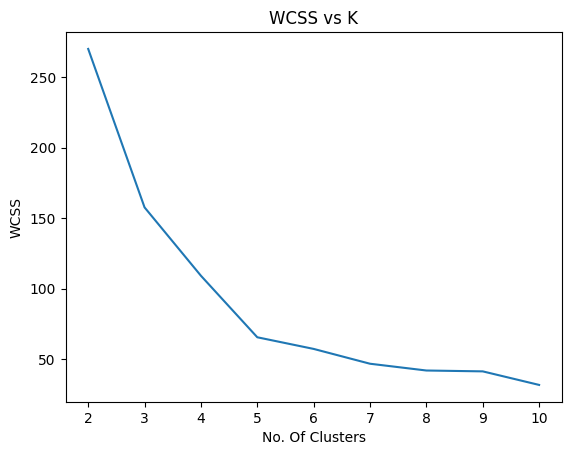

In [6]:
from sklearn.cluster import KMeans
##storing wcss score for each value of k
wcss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++', random_state=6)
    kmeans.fit_transform(scaled_df)
    wcss.append(kmeans.inertia_)
## Ploting WCSS Score vs K (Elbow Method)
plt.plot(range(2,11), wcss)
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.title("WCSS vs K")

## Evaluation of K value using Silhouette Score

Text(0.5, 1.0, 'Silhouette Score vs K')

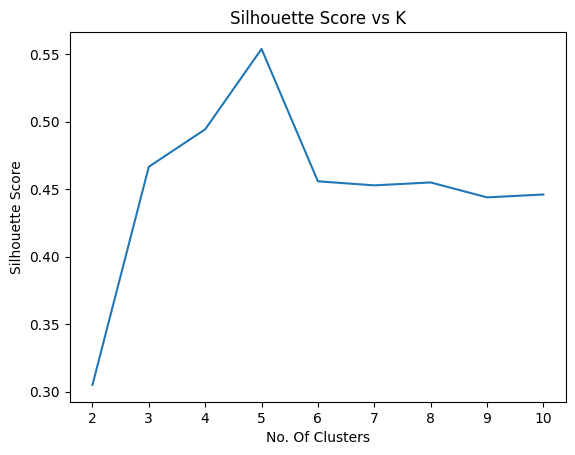

In [7]:
from sklearn.metrics import silhouette_score
sil_score=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++', random_state=6)
    pred=kmeans.fit_predict(scaled_df)
    sil_score.append(silhouette_score(scaled_df,pred))

plt.plot(range(2,11), sil_score)
plt.xlabel('No. Of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score vs K")

Here we can see that at K=5 the silhouette score is maximum.

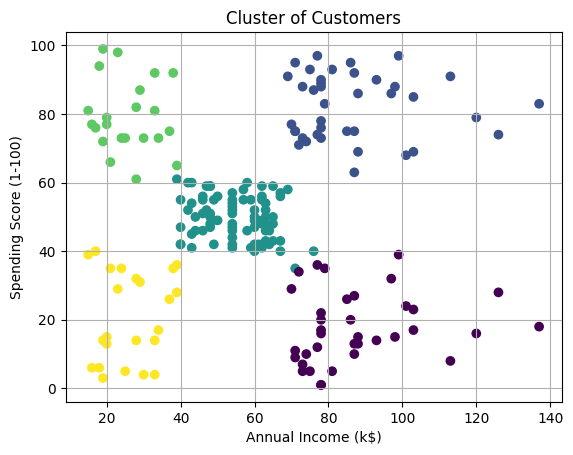

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=6)
pred=kmeans.fit_predict(scaled_df)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=pred)
plt.title('Cluster of Customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

Let's Plot with centroids and with all the cluster label

In [9]:
df_arr=df[['Annual Income (k$)', 'Spending Score (1-100)']].values

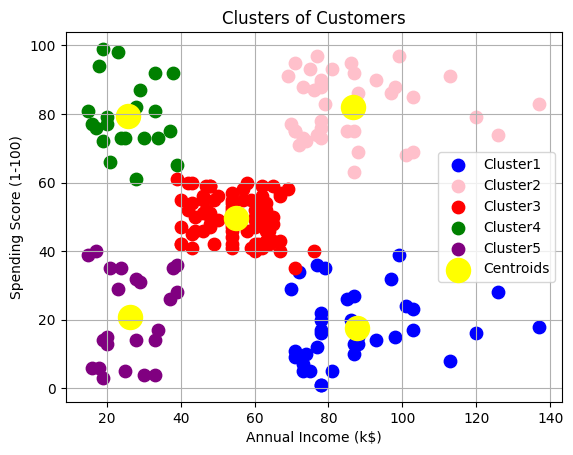

In [10]:
## Plotting Scatter for each Cluster
plt.scatter(df_arr[pred==0,0],df_arr[pred==0,1],s=80,c='blue', label='Cluster1')
plt.scatter(df_arr[pred==1,0],df_arr[pred==1,1],s=80,c='pink', label='Cluster2')
plt.scatter(df_arr[pred==2,0],df_arr[pred==2,1],s=80,c='red', label='Cluster3')
plt.scatter(df_arr[pred==3,0],df_arr[pred==3,1],s=80,c='green', label='Cluster4')
plt.scatter(df_arr[pred==4,0],df_arr[pred==4,1],s=80,c='purple', label='Cluster5')

## Plotting Centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_) ##otherwise cluster would be in scaled form hence we need to first convert in original form
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='o', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()